_Lambda School Data Science — Classification & Validation_ 

# Random Forests & Gradient Boosting

#### Gradient Boosting and Random Forest are often the best choice for “Spreadsheet Machine Learning.”
- Meaning, [Tree Ensembles often have the best predictive accuracy](https://arxiv.org/abs/1708.05070) for supervised learning with structured, tabular data.
- Because trees can fit non-linear, non-monotonic relationships, and interactions between features.
- A single decision tree, grown to unlimited depth, will overfit. We solve this problem by ensembling trees, with bagging or boosting.
- One-hot encoding isn’t the only way, and may not be the best way, of categorical encoding for tree ensembles.



### Links

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [How a Russian mathematician constructed a decision tree - by hand - to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- [Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
- [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
- [A Kaggle Master Explains Gradient Boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)
- [How to explain gradient boosting](https://explained.ai/gradient-boosting/index.html)

#### Python libraries for Gradient Boosting
- [scikit-learn Gradient Tree Boosting](https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting) — slower than other libraries, but [the next version may be better](https://twitter.com/amuellerml/status/1123613520426426368)
  - Anaconda: already installed
  - Google Colab: already installed
- [xgboost](https://xgboost.readthedocs.io/en/latest/) — can accept missing values and enforce [monotonic constraints](https://xiaoxiaowang87.github.io/monotonicity_constraint/)
  - Anaconda, Mac/Linux: `conda install -c conda-forge xgboost`
  - Windows: `pip install xgboost`
  - Google Colab: already installed
- [LightGBM](https://lightgbm.readthedocs.io/en/latest/) — can accept missing values and enforce [monotonic constraints](https://blog.datadive.net/monotonicity-constraints-in-machine-learning/)
  - Anaconda: `conda install -c conda-forge lightgbm`
  - Google Colab: already installed
- [CatBoost](https://catboost.ai/) — can accept missing values and use [categorical features](https://catboost.ai/docs/concepts/algorithm-main-stages_cat-to-numberic.html) without preprocessing
  - Anaconda: `conda install -c conda-forge catboost`
  - Google Colab: `pip install catboost`

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- [Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)
- [Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)


#### More xgboost from Pierre

https://xgboost.readthedocs.io/en/latest/parameter.html

https://github.com/dmlc/xgboost/blob/master/doc/parameter.rst

https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

https://www.kdnuggets.com/2017/03/simple-xgboost-tutorial-iris-dataset.html

https://www.datacamp.com/community/tutorials/xgboost-in-python

# Golf Putts (regression, 1 feature, non-linear)

https://statmodeling.stat.columbia.edu/2008/12/04/the_golf_puttin/

In [1]:
%matplotlib inline
from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

putts = pd.DataFrame(
    columns=['distance', 'tries', 'successes'], 
    data = [[2, 1443, 1346],
            [3, 694, 577],
            [4, 455, 337],
            [5, 353, 208],
            [6, 272, 149],
            [7, 256, 136],
            [8, 240, 111],
            [9, 217, 69],
            [10, 200, 67],
            [11, 237, 75],
            [12, 202, 52],
            [13, 192, 46],
            [14, 174, 54],
            [15, 167, 28],
            [16, 201, 27],
            [17, 195, 31],
            [18, 191, 33],
            [19, 147, 20],
            [20, 152, 24]]
)

putts['rate of success'] = putts['successes'] / putts['tries']
putts_X = putts[['distance']]
putts_y = putts['rate of success']

#### Docs
- [Scikit-Learn User Guide: Random Forests](https://scikit-learn.org/stable/modules/ensemble.html#random-forests) (`from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier`)
- [XGBoost Python API Reference: Scikit-Learn API](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn) (`from xgboost import XGBRegressor, XGBClassifier`)

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor



def putt_trees(max_depth=1, n_estimators=1):
    models = [DecisionTreeRegressor(max_depth=max_depth), 
              RandomForestRegressor(max_depth=max_depth, n_estimators=n_estimators), 
              XGBRegressor(max_depth=max_depth, n_estimators=n_estimators)]
    
    for model in models:
        name = model.__class__.__name__
        model.fit(putts_X, putts_y)
        ax = putts.plot('distance', 'rate of success', kind='scatter', title=name)
        ax.step(putts_X, model.predict(putts_X), where='mid')
        plt.show()
        
interact(putt_trees, max_depth=(1,6,1), n_estimators=(10,40,10));

interactive(children=(IntSlider(value=1, description='max_depth', max=6, min=1), IntSlider(value=10, descripti…

### Bagging
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html

In [11]:
# Do-it-yourself Bagging Ensemble of Decision Trees (like a Random Forest)
def diy_bagging(max_depth=1, n_estimators=1):
    y_preds = []
    for i in range(n_estimators):
        title = f'Tree {i+1}'
        bootstrap_sample = putts.sample(n=len(putts), 
                                        replace=True).sort_values(by='distance')
        bootstrap_X = bootstrap_sample[['distance']]
        bootstrap_y = bootstrap_sample['rate of success']
        tree = DecisionTreeRegressor(max_depth=max_depth)
        tree.fit(bootstrap_X, bootstrap_y)
        y_pred = tree.predict(bootstrap_X)
        y_preds.append(y_pred)
        ax = bootstrap_sample.plot('distance', 'rate of success', 
                                   kind='scatter', title=title)
        ax.step(bootstrap_X, y_pred, where='mid')
        plt.show()
        
    ensembled = np.vstack(y_preds).mean(axis=0)
    title = f'Ensemble of {n_estimators} trees, with max_depth={max_depth}'
    ax = putts.plot('distance', 'rate of success', kind='scatter', title=title)
    ax.step(putts_X, ensembled, where='mid')
    plt.show()
     
interact(diy_bagging, max_depth=(1,6,1), n_estimators=(2,5,1));

interactive(children=(IntSlider(value=1, description='max_depth', max=6, min=1), IntSlider(value=2, descriptio…

### What's "random" about random forests?
1. Each tree trains on a random bootstrap sample of the data. (In scikit-learn, for `RandomForestRegressor` and `RandomForestClassifier`, the `bootstrap` parameter's default is `True`.) This type of ensembling is called Bagging.
2. Each split considers a random subset of the features. (In scikit-learn, when the `max_features` parameter is not `None`.) 

For extra randomness, you can try ["extremely randomized trees"](https://scikit-learn.org/stable/modules/ensemble.html#extremely-randomized-trees)!

>In extremely randomized trees (see [ExtraTreesClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html) and [ExtraTreesRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html) classes), randomness goes one step further in the way splits are computed. As in random forests, a random subset of candidate features is used, but instead of looking for the most discriminative thresholds, thresholds are drawn at random for each candidate feature and the best of these randomly-generated thresholds is picked as the splitting rule. This usually allows to reduce the variance of the model a bit more, at the expense of a slightly greater increase in bias

### Boosting 

Boosting (used by Gradient Boosting) is different than Bagging (used by Random Forests). 

[_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf) Chapter 8.2.3, Boosting:

>Recall that bagging involves creating multiple copies of the original training data set using the bootstrap, fitting a separate decision tree to each copy, and then combining all of the trees in order to create a single predictive model.

>**Boosting works in a similar way, except that the trees are grown _sequentially_: each tree is grown using information from previously grown trees.**

>Unlike fitting a single large decision tree to the data, which amounts to _fitting the data hard_ and potentially overfitting, the boosting approach instead _learns slowly._ Given the current model, we fit a decision tree to the residuals from the model.

>We then add this new decision tree into the fitted function in order to update the residuals. Each of these trees can be rather small, with just a few terminal nodes. **By fitting small trees to the residuals, we slowly improve fˆ in areas where it does not perform well.**

>Note that in boosting, unlike in bagging, the construction of each tree depends strongly on the trees that have already been grown.

# Wave (regression, 1 feature, non-monotonic, train/test split)

http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

In [12]:
from sklearn.model_selection import train_test_split

def make_data():
    import numpy as np
    rng = np.random.RandomState(1)
    X = np.sort(5 * rng.rand(80, 1), axis=0)
    y = np.sin(X).ravel()
    y[::5] += 2 * (0.5 - rng.rand(16))
    return X, y

wave_X, wave_y = make_data()
wave_X_train, wave_X_test, wave_y_train, wave_y_test = train_test_split(
    wave_X, wave_y, test_size=0.25, random_state=42)

In [13]:
def wave_trees(max_depth=1, n_estimators=10):
    models = [DecisionTreeRegressor(max_depth=max_depth), 
              RandomForestRegressor(max_depth=max_depth, n_estimators=n_estimators), 
              XGBRegressor(max_depth=max_depth, n_estimators=n_estimators)]
    
    for model in models:
        name = model.__class__.__name__
        model.fit(wave_X_train, wave_y_train)
        print(f'{name} Train R^2 score:', model.score(wave_X_train, wave_y_train))
        print(f'{name} Test R^2 score:', model.score(wave_X_test, wave_y_test))
        plt.scatter(wave_X_train, wave_y_train)
        plt.scatter(wave_X_test, wave_y_test)
        plt.step(wave_X, model.predict(wave_X), where='mid')
        plt.show()
        
interact(wave_trees, max_depth=(1,8,1), n_estimators=(10,40,10));

interactive(children=(IntSlider(value=1, description='max_depth', max=8, min=1), IntSlider(value=10, descripti…

# Titanic (classification, 2 features, interactions, non-linear / non-monotonic)

#### viz2D helper function

In [14]:
def viz2D(fitted_model, X, feature1, feature2, num=100, title=''):
    """
    Visualize model predictions as a 2D heatmap
    For regression or binary classification models, fitted on 2 features
    
    Parameters
    ----------
    fitted_model : scikit-learn model, already fitted
    df : pandas dataframe, which was used to fit model
    feature1 : string, name of feature 1
    feature2 : string, name of feature 2
    target : string, name of target
    num : int, number of grid points for each feature
    
    Returns
    -------
    predictions: numpy array, predictions/predicted probabilities at each grid point
    
    References
    ----------
    https://scikit-learn.org/stable/auto_examples/classification/plot_classification_probability.html
    https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html
    """
    x1 = np.linspace(X[feature1].min(), X[feature1].max(), num)
    x2 = np.linspace(X[feature2].min(), X[feature2].max(), num)
    X1, X2 = np.meshgrid(x1, x2)
    X = np.c_[X1.flatten(), X2.flatten()]
    if hasattr(fitted_model, 'predict_proba'):
        predicted = fitted_model.predict_proba(X)[:,1]
    else:
        predicted = fitted_model.predict(X)
    
    plt.imshow(predicted.reshape(num, num), cmap='viridis')
    plt.title(title)
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    plt.show()
    return predicted

### Read data, encode categorical feature, impute missing values

In [15]:
import category_encoders as ce
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

titanic = sns.load_dataset('titanic')
features = ['age', 'sex']
target = 'survived'

preprocessor = make_pipeline(ce.OrdinalEncoder(), SimpleImputer())
X = preprocessor.fit_transform(titanic[features])
X = pd.DataFrame(X, columns=features)
y = titanic[target]

X.head()

,age,sex
0,22.0,1.0
1,38.0,2.0
2,26.0,2.0
3,35.0,2.0
4,35.0,1.0


In [17]:
titanic.groupby('embark_town').survived.mean()

embark_town
Cherbourg      0.553571
Queenstown     0.389610
Southampton    0.336957
Name: survived, dtype: float64

### Logistic Regression

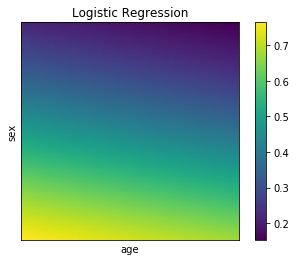

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs')
lr.fit(X, y)
viz2D(lr, X, feature1='age', feature2='sex', title='Logistic Regression');

### Decision Tree, Random Forest, Gradient Boosting

#### Docs
- [Scikit-Learn User Guide: Random Forests](https://scikit-learn.org/stable/modules/ensemble.html#random-forests) (`from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier`)
- [XGBoost Python API Reference: Scikit-Learn API](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn) (`from xgboost import XGBRegressor, XGBClassifier`)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

def titanic_trees(max_depth=1, n_estimators=1):
    models = [DecisionTreeClassifier(max_depth=max_depth), 
              RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators), 
              XGBClassifier(max_depth=max_depth, n_estimators=n_estimators)]
    
    for model in models:
        name = model.__class__.__name__
        model.fit(X.values, y.values)
        viz2D(model, X, feature1='age', feature2='sex', title=name)
        
interact(titanic_trees, max_depth=(1,6,1), n_estimators=(10,40,10));

interactive(children=(IntSlider(value=1, description='max_depth', max=6, min=1), IntSlider(value=10, descripti…

### Bagging

In [19]:
# Do-it-yourself Bagging Ensemble of Decision Trees (like a Random Forest)

def titanic_bagging(max_depth=1, n_estimators=1):
    predicteds = []
    for i in range(n_estimators):
        title = f'Tree {i+1}'
        bootstrap_sample = titanic.sample(n=len(titanic), replace=True)
        preprocessor = make_pipeline(ce.OrdinalEncoder(), SimpleImputer())
        bootstrap_X = preprocessor.fit_transform(bootstrap_sample[['age', 'sex']])
        bootstrap_y = bootstrap_sample['survived']
        tree = DecisionTreeClassifier(max_depth=max_depth)
        tree.fit(bootstrap_X, bootstrap_y)
        predicted = viz2D(tree, X, feature1='age', feature2='sex', title=title)
        predicteds.append(predicted)
    
    ensembled = np.vstack(predicteds).mean(axis=0)
    title = f'Ensemble of {n_estimators} trees, with max_depth={max_depth}'
    plt.imshow(ensembled.reshape(100, 100), cmap='viridis')
    plt.title(title)
    plt.xlabel('age')
    plt.ylabel('sex')
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    plt.show()
        
interact(titanic_bagging, max_depth=(1,6,1), n_estimators=(2,5,1));

interactive(children=(IntSlider(value=1, description='max_depth', max=6, min=1), IntSlider(value=2, descriptio…

### Select more features, compare models

In [20]:
from sklearn.preprocessing import MinMaxScaler

titanic['deck'] = titanic['deck'].astype(str)
features = ['age', 'sex', 'pclass', 'sibsp', 'parch', 'fare', 'deck', 'embark_town']
target = 'survived'

preprocessor = make_pipeline(ce.OrdinalEncoder(), SimpleImputer(), MinMaxScaler())
titanic_X = preprocessor.fit_transform(titanic[features])
titanic_X = pd.DataFrame(titanic_X, columns=features)
titanic_y = titanic[target]

titanic_X.head()

,age,sex,pclass,sibsp,parch,fare,deck,embark_town
0,0.271174,0.0,1.0,0.125,0.0,0.014151,0.000000,0.000000
1,0.472229,1.0,0.0,0.125,0.0,0.139136,0.142857,0.333333
2,0.321438,1.0,1.0,0.000,0.0,0.015469,0.000000,0.000000
3,0.434531,1.0,0.0,0.125,0.0,0.103644,0.142857,0.000000
4,0.434531,0.0,1.0,0.000,0.0,0.015713,0.000000,0.000000


In [21]:


models = [LogisticRegression(solver='lbfgs', max_iter=1000), 
          DecisionTreeClassifier(max_depth=3), 
          DecisionTreeClassifier(max_depth=None), 
          RandomForestClassifier(max_depth=3, n_estimators=100, n_jobs=-1, random_state=42), 
          RandomForestClassifier(max_depth=None, n_estimators=100, n_jobs=-1, random_state=42), 
          XGBClassifier(max_depth=3, n_estimators=100, n_jobs=-1, random_state=42)]

for model in models:
    print(model, '\n')
    score = cross_val_score(model, titanic_X, titanic_y, scoring='accuracy', cv=5).mean()
    print('Cross-Validation Accuracy:', score, '\n', '\n')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False) 

Cross-Validation Accuracy: 0.7911905757420685 
 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 

Cross-Validation Accuracy: 0.8047054617955187 
 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0

### Feature importances

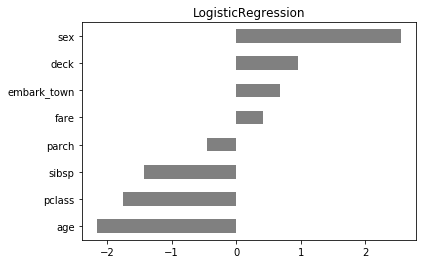

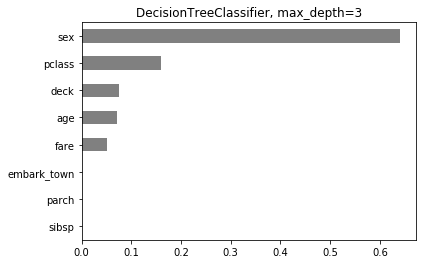

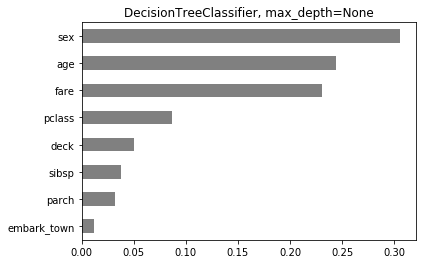

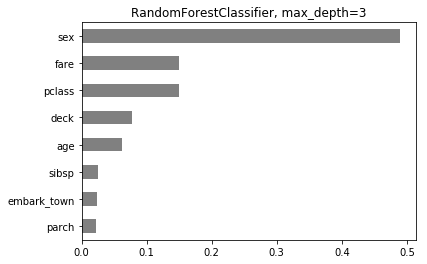

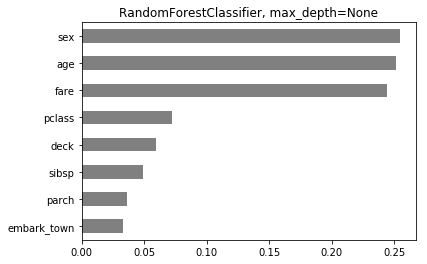

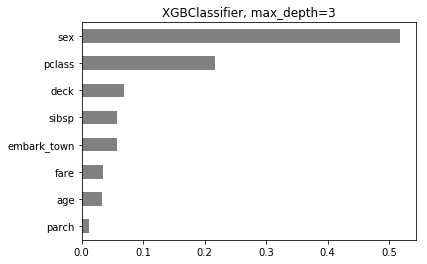

In [22]:
for model in models:
    name = model.__class__.__name__
    model.fit(titanic_X, titanic_y)
    if name == 'LogisticRegression':
        coefficients = pd.Series(model.coef_[0], titanic_X.columns)
        coefficients.sort_values().plot.barh(color='grey', title=name)
        plt.show()
    else:
        importances = pd.Series(model.feature_importances_, titanic_X.columns)
        title = f'{name}, max_depth={model.max_depth}'
        importances.sort_values().plot.barh(color='grey', title=title)
        plt.show()

# ASSIGNMENT

**Train Random Forest and Gradient Boosting models**, on the Bank Marketing dataset. (Or another dataset of your choice, not used during this lesson.) You may use any Python libraries for Gradient Boosting.

Then, you have many options!

#### Keep improving your model
- **Try new categorical encodings.**
- Explore and visualize your data. 
- Wrangle [bad data](https://github.com/Quartz/bad-data-guide), outliers, and missing values.
- Try engineering more features. You can transform, bin, and combine features. 
- Try selecting fewer features.

#### Follow the links — learn by reading & doing
- Links at the top of this notebook
- Links in previous notebooks
- Extra notebook for today, about **"monotonic constraints"** and "early stopping" with xgboost

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

My goal below was to create a program that would test multiple regressions and output an optimal set of parameters. I've done that, but it's quite brute force and I'm now focusing on the reading and study

In [131]:
import category_encoders as ce


# Load data
bank = pd.read_csv('bank-additional-full.csv', sep=';')

# Assign features and target
features = bank.drop(columns='y').columns.tolist()
target = 'y' #bank['y'] == 'yes'

# pipeline for preprocessing
preprocessor = make_pipeline(ce.OrdinalEncoder(), 
                            SimpleImputer(),
                            MinMaxScaler()
                            )
# preprocess feature data
X = preprocessor.fit_transform(bank[features])
X = pd.DataFrame(X, columns = features)
y = bank[target] == 'yes'



# Drop leaky & random features
X = X.drop(columns={'duration'})
X['education'] = bank['education'].map({'basic.4y':1,
                                          'high.school':1,
                                          'basic.6y':1,
                                          'basic.9y':1,
                                          'professional.course':2,
                                          'university.degree':2,
                                          'unknown':0,
                                          'illiterate':-1})
X['age_round_10'] = X['age'].round(-1)


# Split Train, Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)



from sklearn.model_selection import cross_val_score

randseed = 314

# weight= {0: 1, 1: 1}
# depth=1
# n=1
models = [LogisticRegression(solver='lbfgs', max_iter=1000, class_weight=weight,
                             random_state=randseed),
          DecisionTreeClassifier(max_depth=depth, class_weight=weight,
                                 random_state=randseed),
          RandomForestClassifier(max_depth=depth, class_weight=weight,
                                 random_state=randseed),
          XGBClassifier(max_depth=depth, n_estimators = n,
                        n_jobs=-1, random_state=randseed)
         ]

max_depth=(1,3,6,9,12) 
n_estimators=(10,40, 60,80, 100)

weights = [{0: 1, 1: 1}, #(equivalent to None)
{0: 1, 1: 2},
{0: 1, 1: 10}, #(roughly equivalent to 'balanced' for this dataset)
{0: 1, 1: 100},
{0: 1, 1: 10000}]

# dataframe to hold all values
results = pd.DataFrame(columns = ['Model', 'CV_ROC_AUC_Score', 
            'Test_AUC_Score', 'max_depth', 'n_estimators', 'class_weight'])

for weight in weights:
    for depth in max_depth:
        for n in n_estimators:
            for model in models:
                
                #generate cross val score
                score = cross_val_score(model, X_train, y_train, scoring='roc_auc', 
                                        cv=10, n_jobs=-1, verbose=True).mean()

                #     print('Test score: 'model_.score(X_test, y_test))
                model.fit(X_train, y_train)
                y_pred_proba = model.predict_proba(X_test)[:,1]
                test_roc = roc_auc_score(y_test, y_pred_proba)

                # append to dataframe
                results = results.append({'Model': model, 'CV_ROC_AUC_Score': score, 
            'Test_AUC_Score': test_roc, 'max_depth':depth, 'n_estimators':n, 
                                          'class_weight': weight}, 
                                ignore_index=True)

results.sort_values(by='Test_AUC_Score', ascending=False)
#     print('Cross-Validation ROC_AUC Score: ', score, '\n\n')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished
/home/nedderlander/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   19.4s finished
[Para

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   20.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   20.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   19.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   19.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   19.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   19.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done

,Model,CV_ROC_AUC_Score,Test_AUC_Score,max_depth,n_estimators,class_weight
299,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.77892,0.800199,12,100,"{0: 1, 1: 10000}"
263,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.77892,0.800199,3,100,"{0: 1, 1: 10000}"
223,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.77892,0.800199,9,40,"{0: 1, 1: 100}"
111,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.77892,0.800199,12,10,"{0: 1, 1: 2}"
227,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.77892,0.800199,9,100,"{0: 1, 1: 100}"
107,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.77892,0.800199,9,100,"{0: 1, 1: 2}"
103,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.77892,0.800199,9,40,"{0: 1, 1: 2}"
231,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.77892,0.800199,12,10,"{0: 1, 1: 100}"
99,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.77892,0.800199,9,10,"{0: 1, 1: 2}"
235,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.77892,0.800199,12,40,"{0: 1, 1: 100}"


In [136]:
results.sort_values(by='Test_AUC_Score', ascending=False)
# looks like XGB gets up to .8 without additional features

,Model,CV_ROC_AUC_Score,Test_AUC_Score,max_depth,n_estimators,class_weight
299,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.77892,0.800199,12,100,"{0: 1, 1: 10000}"
263,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.77892,0.800199,3,100,"{0: 1, 1: 10000}"
223,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.77892,0.800199,9,40,"{0: 1, 1: 100}"
111,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.77892,0.800199,12,10,"{0: 1, 1: 2}"
227,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.77892,0.800199,9,100,"{0: 1, 1: 100}"
107,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.77892,0.800199,9,100,"{0: 1, 1: 2}"
103,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.77892,0.800199,9,40,"{0: 1, 1: 2}"
231,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.77892,0.800199,12,10,"{0: 1, 1: 100}"
99,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.77892,0.800199,9,10,"{0: 1, 1: 2}"
235,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.77892,0.800199,12,40,"{0: 1, 1: 100}"
